# Week2_Assignment

CPU计算能力有限，计算贼慢，正则项调优调参速度比较慢，计算结果未完全跑出来

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import log_loss

from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans

from nltk.metrics import distance as distance
from scipy import sparse


from MeanEncoder import *
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [2]:
dpath = "./week2data_RentListingInquries/"
train = pd.read_json(dpath + "RentListingInquries_train.json")
test = pd.read_json(dpath+"RentListingInquries_test.json")

In [3]:
train.columns

Index([u'bathrooms', u'bedrooms', u'building_id', u'created', u'description',
       u'display_address', u'features', u'interest_level', u'latitude',
       u'listing_id', u'longitude', u'manager_id', u'photos', u'price',
       u'street_address'],
      dtype='object')

In [4]:
train.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


In [5]:
train.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [7]:
train.shape

(49352, 15)

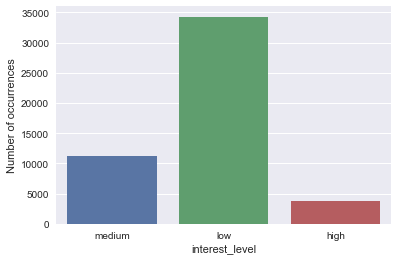

In [8]:
sns.countplot(train.interest_level);
plt.xlabel('interest_level');
plt.ylabel('Number of occurrences');

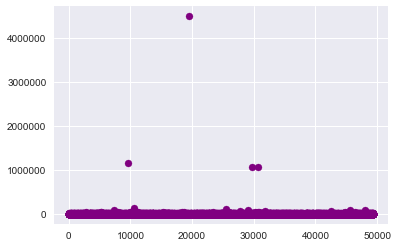

In [9]:
plt.scatter(range(train.shape[0]), train["price"].values, color ='purple')

In [10]:
ulimit = np.percentile(train.price.values, 99)
train['price'].ix[train['price']>ulimit] = ulimit

/Users/Yubo/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  
/Users/Yubo/anaconda3/envs/py27/lib/python2.7/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


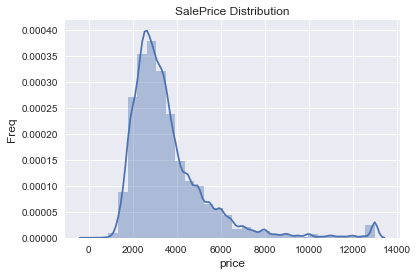

In [11]:
plt.figure()
sns.distplot(train.price.values, bins=30, kde=True)
plt.xlabel('price', fontsize=12)
plt.ylabel('Freq',fontsize = 12)
plt.title('SalePrice Distribution') 

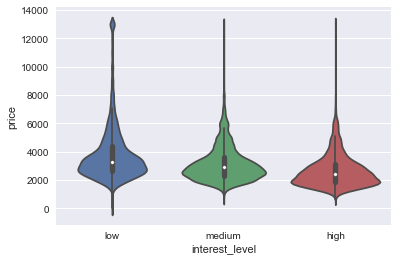

In [12]:
order = ['low','medium','high']
sns.violinplot(x = train.interest_level,y = train.price,data = train, order = order)

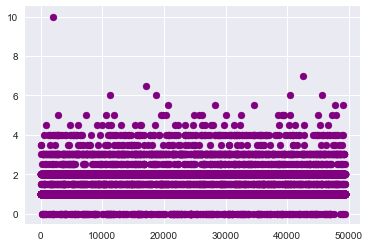

In [13]:
plt.scatter(range(train.shape[0]), train["bathrooms"].values,color='purple')

In [14]:
train = train[train.bathrooms.values <= 4]

In [15]:
train.shape

(49291, 15)

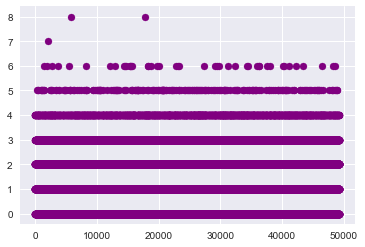

In [16]:
plt.scatter(range(train.shape[0]), train["bedrooms"].values,color='purple')

In [17]:
train = train[train.bedrooms.values <= 5]

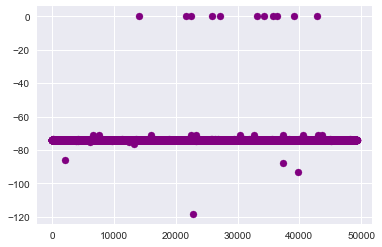

In [18]:
plt.scatter(range(train.shape[0]),train.longitude.values,color = 'purple')


In [19]:
train = train[train.longitude.values < -60] 
train = train[train.longitude.values > -80]

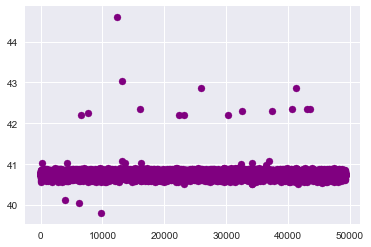

In [20]:
plt.scatter(range(train.shape[0]),train.latitude.values,color = 'purple')

In [21]:
train = train[train.latitude.values < 42] 
train = train[train.latitude.values > 40 ]

In [22]:
y_map = {'low': 1, 'medium': 2, 'high': 3}
train['interest_level'] = train['interest_level'].apply(lambda x: y_map[x])

y_train = train.interest_level
train = train.drop(['listing_id', 'interest_level'], axis=1)

listing_id = test.listing_id.values
test = test.drop('listing_id', axis=1)

ntrain = train.shape[0]
train_test = pd.concat((train, test), axis=0).reset_index(drop=True)

In [23]:
y_train

10        2
10000     1
100004    3
100007    1
100013    1
100014    2
100016    1
100020    1
100026    2
100027    1
100030    1
10004     1
100044    3
100048    1
10005     1
100051    2
100052    1
100053    1
100055    1
100058    1
100062    1
100063    2
100065    1
100066    1
10007     2
100071    1
100075    2
100076    1
100079    3
100081    1
         ..
99915     1
99917     1
99919     2
99921     2
99923     1
99924     1
99931     1
99933     1
99935     1
99937     1
9994      1
99953     1
99956     1
99960     2
99961     1
99964     2
99965     1
99966     1
99979     1
99980     1
99982     3
99984     1
99986     1
99987     1
99988     2
9999      2
99991     1
99992     1
99993     1
99994     1
Name: interest_level, Length: 49213, dtype: int64

In [24]:
train_test['price'].ix[train_test['price']>13000] = 13000

/Users/Yubo/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


In [25]:
train_test.loc[train_test["bathrooms"] == 112, "bathrooms"] = 1.5
train_test.loc[train_test["bathrooms"] == 10, "bathrooms"] = 1
train_test.loc[train_test["bathrooms"] == 20, "bathrooms"] = 2

In [26]:
train_test['Date'] = pd.to_datetime(train_test['created'])
train_test['Year'] = train_test['Date'].dt.year
train_test['Month'] = train_test['Date'].dt.month
train_test['Day'] = train_test['Date'].dt.day
train_test['Wday'] = train_test['Date'].dt.dayofweek
train_test['Yday'] = train_test['Date'].dt.dayofyear
train_test['hour'] = train_test['Date'].dt.hour

train_test = train_test.drop(['Date', 'created'], axis=1)

In [27]:
train_test["num_description_words"] = train_test["description"].apply(lambda x: len(x.split(" ")))
train_test = train_test.drop(['description'], axis=1)

In [28]:
managers_count = train_test['manager_id'].value_counts()

train_test['top_10_manager'] = train_test['manager_id'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 90)] else 0)
train_test['top_25_manager'] = train_test['manager_id'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 75)] else 0)
train_test['top_5_manager'] = train_test['manager_id'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 95)] else 0)
train_test['top_50_manager'] = train_test['manager_id'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 50)] else 0)
train_test['top_1_manager'] = train_test['manager_id'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 99)] else 0)
train_test['top_2_manager'] = train_test['manager_id'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 98)] else 0)
train_test['top_15_manager'] = train_test['manager_id'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 85)] else 0)
train_test['top_20_manager'] = train_test['manager_id'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 80)] else 0)
train_test['top_30_manager'] = train_test['manager_id'].apply(lambda x: 1 if x in managers_count.index.values[
    managers_count.values >= np.percentile(managers_count.values, 70)] else 0)

In [29]:
buildings_count = train_test['building_id'].value_counts()

train_test['top_10_building'] = train_test['building_id'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 90)] else 0)
train_test['top_25_building'] = train_test['building_id'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 75)] else 0)
train_test['top_5_building'] = train_test['building_id'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 95)] else 0)
train_test['top_50_building'] = train_test['building_id'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 50)] else 0)
train_test['top_1_building'] = train_test['building_id'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 99)] else 0)
train_test['top_2_building'] = train_test['building_id'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 98)] else 0)
train_test['top_15_building'] = train_test['building_id'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 85)] else 0)
train_test['top_20_building'] = train_test['building_id'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 80)] else 0)
train_test['top_30_building'] = train_test['building_id'].apply(lambda x: 1 if x in buildings_count.index.values[
    buildings_count.values >= np.percentile(buildings_count.values, 70)] else 0)

In [30]:
train_test['photos_count'] = train_test['photos'].apply(lambda x: len(x))
train_test.drop(['photos'], axis=1, inplace=True)

In [31]:
# Clustering
train_location = train_test.loc[:ntrain-1, ['latitude', 'longitude']]
test_location = train_test.loc[ntrain:, ['latitude', 'longitude']]

kmeans_cluster = KMeans(n_clusters=20)
res = kmeans_cluster.fit(train_location)
res = kmeans_cluster.predict( pd.concat((train_location, test_location), axis=0).reset_index(drop=True))

train_test['cenroid'] = res

# L1 distance
center = [ train_location['latitude'].mean(), train_location['longitude'].mean()]
train_test['distance'] = abs(train_test['latitude'] - center[0]) + abs(train_test['longitude'] - center[1])

In [32]:
train_test['display_address'] = train_test['display_address'].apply(lambda x: x.lower().strip())

In [33]:
train_test['street_address'] = train_test['street_address'].apply(lambda x: x.lower().strip())

In [34]:
categoricals = ['building_id', 'manager_id', 'display_address', 'street_address']
#categoricals = [x for x in train_test.columns if train_test[x].dtype == 'object']
for feat in categoricals:
    lbl = LabelEncoder()
    lbl.fit(list(train_test[feat].values))
    train_test[feat] = lbl.transform(list(train_test[feat].values))

In [35]:
me = MeanEncoder(categoricals)

#trian
#import pdb
#pdb.set_trace()
train_new = train_test.iloc[:ntrain, :]
train_new_cat = me.fit_transform(train_new, y_train)

#test
test_new = train_test.iloc[ntrain:, :]
test_new_cat = me.transform(test_new)



MeanEncoder.py:53: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  col_avg_y = X_train.groupby(by=variable, axis=0)['pred_temp'].agg({'mean': 'mean', 'beta': 'size'})
MeanEncoder.py:38: RuntimeWarning: overflow encountered in exp
  self.prior_weight_func = lambda x: 1 / (1 + np.exp((x - 2) / 1))


In [36]:
train_test = pd.concat((train_new_cat, test_new_cat), axis=0).reset_index(drop=True)
train_test.drop(categoricals, axis=1, inplace=True)

In [37]:
train_test['features_count'] = train_test['features'].apply(lambda x: len(x))
train_test['features2'] = train_test['features']
train_test['features2'] = train_test['features2'].apply(lambda x: ' '.join(x))

c_vect = CountVectorizer(stop_words='english', max_features=200, ngram_range=(1, 1))
c_vect_sparse = c_vect.fit_transform(train_test['features2'])
c_vect_sparse_cols = c_vect.get_feature_names()

train_test.drop(['features', 'features2'], axis=1, inplace=True)

#hstack作为特征处理的最后一部，先将其他所有特征都转换成数值型特征才能处理
train_test_sparse = sparse.hstack([train_test, c_vect_sparse]).tocsr()

In [38]:
#存为csv格式方便用excel查看
train_test_new = pd.DataFrame(train_test_sparse.toarray())
X_train = train_test_new.iloc[:ntrain, :]
X_test = train_test_new.iloc[ntrain:, :]

train_new = pd.concat((X_train, y_train), axis=1).reset_index(drop=True)
train_new.to_csv(dpath + 'RentListingInquries_FE_train.csv', index=False)
X_test.to_csv(dpath + 'RentListingInquries_FE_test.csv', index=False)

In [39]:
from  scipy.io import mmwrite

X_train_sparse = train_test_sparse[:ntrain, :]
X_test_sparse = train_test_sparse[ntrain:, :]

train_sparse = sparse.hstack([X_train_sparse, sparse.csr_matrix(y_train).T]).tocsr()

mmwrite(dpath + 'RentListingInquries_FE_train.txt',train_sparse)
mmwrite(dpath + 'RentListingInquries_FE_test.txt',X_test_sparse)

#存为libsvm稀疏格式，直接调用XGBoost的话用稀疏格式更高效
#from sklearn.datasets import dump_svmlight_file
#dump_svmlight_file(, y_train, dpath + 'RentListingInquries_FE_train.txt',X_train_sparse) 
#dump_svmlight_file(X_test_sparse,  dpath + 'RentListingInquries_FE_test.txt') 

In [40]:
train_test_new = pd.DataFrame(train_test_sparse.toarray())
X_train = train_test_new.iloc[:ntrain, :]
X_test = train_test_new.iloc[ntrain:, :]

train_new = pd.concat((X_train, y_train), axis=1)

## 数据预处理

In [41]:
from sklearn.preprocessing import StandardScaler

# 初始化特征的标准化器
ss_X = StandardScaler()

# 分别对训练和测试数据的特征进行标准化处理
X_train = ss_X.fit_transform(X_train)
#X_test = ss_X.transform(X_test)



## 模型训练
### default Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

In [43]:
# 交叉验证用于评估模型性能和进行参数调优（模型选择）
#分类任务中交叉验证缺省是采用StratifiedKFold
from sklearn.cross_validation import cross_val_score
loss = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_log_loss')
print 'logloss of each fold is: ',-loss
print'cv logloss is:', -loss.mean()

/Users/Yubo/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


logloss of each fold is:  [ 0.67824145  0.66993097  0.66188484  0.65475363  0.6721036 ]
cv logloss is: 0.667382899205


### 正则化的 Logistic Regression及参数调优
#### 如果用所有样本计算时间太长，就选用10000个左右吧

In [44]:
X_train.shape

(49213, 246)

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#需要调优的参数
# 请尝试将L1正则和L2正则分开，并配合合适的优化求解算法（slover）
#tuned_parameters = {'penalty':['l1','l2'],
#                   'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
#                   }
penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters = dict(penalty = penaltys, C = Cs)

lr_penalty= LogisticRegression()
grid= GridSearchCV(lr_penalty, tuned_parameters,cv=5, scoring='neg_log_loss')
grid.fit(X_train[0:999,:],y_train[0:999])

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_log_loss', verbose=0)

In [49]:
grid.cv_results_

{'mean_fit_time': array([  0.01350856,   0.03142576,   0.02725306,   0.0622014 ,
          0.06365261,   0.11733975,   0.34790859,   0.29848852,
          1.24738321,   0.61954432,   6.37210898,   1.020046  ,
         10.71055045,   1.2645628 ]),
 'mean_score_time': array([ 0.00120115,  0.00116525,  0.0015758 ,  0.00109701,  0.00102105,
         0.00108986,  0.00126076,  0.00175729,  0.00114679,  0.00117245,
         0.00104842,  0.00115843,  0.0010798 ,  0.00108981]),
 'mean_test_score': array([-1.09861229, -0.94771546, -0.89437943, -0.81420789, -0.73422277,
        -0.81473253, -0.81749281, -0.90288096, -0.96224799, -1.01083909,
        -1.11686835, -1.124239  , -1.30435733, -1.22184167]),
 'mean_train_score': array([-1.09861229, -0.91332308, -0.89267145, -0.70397653, -0.64935212,
        -0.57906655, -0.54049374, -0.53505602, -0.52851552, -0.52817907,
        -0.52679309, -0.52689578, -0.52658357, -0.52652051]),
 'param_C': masked_array(data = [0.001 0.001 0.01 0.01 0.1 0.1 1 1 10 1

In [50]:
# examine the best model
print(-grid.best_score_)
print(grid.best_params_)

0.73422276629
{'penalty': 'l1', 'C': 0.1}


### RBF核SVM正则参数调优



In [54]:
from sklearn.model_selection import train_test_split
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, train_size = 0.8,random_state = 0)

In [55]:
from sklearn.svm import SVC

In [56]:
def fit_grid_point_RBF(C, gamma, X_train, y_train, X_val, y_val):
    
    # 在训练集是那个利用SVC训练
    SVC3 =  SVC( C = C, kernel='rbf', gamma = gamma)
    SVC3 = SVC3.fit(X_train, y_train)
    
    # 在校验集上返回accuracy
    accuracy = SVC3.score(X_val, y_val)
    
    print("accuracy: {}".format(accuracy))
    return accuracy

In [ ]:
#需要调优的参数
C_s = np.logspace(-2, 2, 5)# logspace(a,b,N)把10的a次方到10的b次方区间分成N份 
gamma_s = np.logspace(-2, 2, 5)  

accuracy_s = []
for i, oneC in enumerate(C_s):
    for j, gamma in enumerate(gamma_s):
        tmp = fit_grid_point_RBF(oneC, gamma, X_train, y_train, X_val, y_val)
        accuracy_s.append(tmp)

